## TSVD - Truncated Singular Value Decomposition
```
FileName: TSVD-v2.ipynb
Creation Date: 14-Jul-2018
Input: Librosa120Sec577FeatsCSVExtract20_v3.gzip
Output: Librosa120Sec577FeatsCSVExtract20_v3_ReducedTSVD.gzip
Runtime: 20 mins
Description: Reduce Features.  from TSVD we derive top Feature list; Data is transformed here
Version:
    v1: 12-Jul-2018: Initial Version
    v2: 14-Jul-2018: Adding three parameters 1. Transformed Output, 2. Transformed Output with new headers
                     3. Original Data output
```

In [64]:
# fileNameNoPrefix = "Librosa120Sec577FeatsCSVExtract20_v3" # Train
fileNameNoPrefix = "Librosa120Sec577FeatsCSVExtract10Test_v3" # Test
# trainOrTestFlag = "Test"
retainVariance = 0.99 # Retain 95% of variance (Used for Train)
writeTransformedDataFlag = True
writeTransformedDataHeaderOverrideFlag = True

In [65]:
# Load libraries
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD
from scipy.sparse import csr_matrix
import numpy as np
import pandas as pd
import datetime

In [66]:
now = datetime.datetime.now()
print (now.strftime("%Y-%m-%d %H:%M:%S"))

2018-07-14 07:56:41


In [67]:
from matplotlib import pyplot as plt

def plot_step_lda(newX_data, newY_data):

    label_dict = {0: 'Sad', 1: 'Happy'}

    ax = plt.subplot(111)
    for label,marker,color in zip(
        range(0,2),('^', 's'),('blue', 'red')):

        plt.scatter(x=newX_data[:,0].real[newY_data == label],
                y=newX_data[:,1].real[newY_data == label],
                marker=marker,
                color=color,
                alpha=0.5,
                label=label_dict[label]
                )

    plt.xlabel('LD1')
    plt.ylabel('LD2')

    leg = plt.legend(loc='upper right', fancybox=True)
    leg.get_frame().set_alpha(0.5)
    plt.title('LDA: Iris projection onto the first 2 linear discriminants')

    # hide axis ticks
    plt.tick_params(axis="both", which="both", bottom="off", top="off",  
            labelbottom="on", left="off", right="off", labelleft="on")

    # remove axis spines
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)    

    plt.grid()
    plt.tight_layout
    plt.show()

In [68]:
df = pd.read_csv(filepath_or_buffer=(fileNameNoPrefix + '.gzip'), sep=',', compression='gzip')
df.dropna(how="all", inplace=True) # to drop the empty line at file-end

In [69]:
x_data = df.drop('label',axis=1)
y_labels = df['label'].values

In [70]:
x_data.shape

(101814, 577)

In [71]:
y_labels.shape

(101814,)

In [72]:
y_labels

array([0., 0., 0., ..., 1., 1., 1.])

In [73]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_data,y_labels,test_size=0.00001,random_state=101) # 71351729)

In [74]:
import sklearn
scaler = sklearn.preprocessing.StandardScaler()
# scaler = sklearn.preprocessing.MinMaxScaler()
# scaler = sklearn.preprocessing.MaxAbsScaler()
# scaler = sklearn.preprocessing.QuantileTransformer()
# scaler = sklearn.preprocessing.Normalizer()

In [75]:
X_train = pd.DataFrame(data=scaler.fit_transform(X_train),columns=X_train.columns,index=X_train.index)
X_test  = pd.DataFrame(data=scaler.transform(X_test),columns=X_test.columns,index=X_test.index)

C:\Users\USWU32441\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


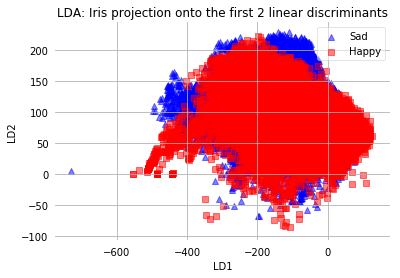

In [76]:
plot_step_lda(x_data.as_matrix(columns=None), y_labels)

C:\Users\USWU32441\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


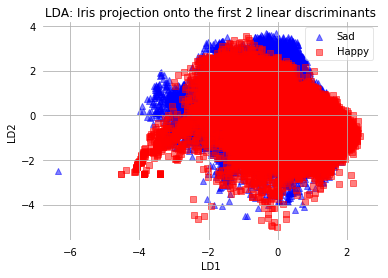

In [77]:
plot_step_lda(X_train.as_matrix(columns=None), y_train)

In [78]:
# Make sparse matrix 
features_sparse = csr_matrix(X_train)

In [79]:
# Create a function
def select_n_components(var_ratio, goal_var):
    # Set initial variance explained so far
    total_variance = 0.0 
    # Set initial number of features 
    n_components = 0 
    # For the explained variance of each feature: 
    for explained_variance in var_ratio:
        # Add the explained variance to the total
        total_variance += explained_variance
        # Add one to the number of components 
        n_components += 1 
        # If we reach our goal level of explained variance 
        if total_variance >= goal_var: 
            # End the loop
            break 
    # Return the number of components
    return n_components

In [80]:
# uses retainVariance
def getFeatCount(retainVariance):
    # Create and run an TSVD with one less than number of features
    tsvd = TruncatedSVD(n_components=features_sparse.shape[1]-1)
    features_tsvd = tsvd.fit(features_sparse)
    
    # List of explained variances
    tsvd_var_ratios = tsvd.explained_variance_ratio_
    
    # Run function 
    n_feats = select_n_components(tsvd_var_ratios, retainVariance)
    print("Number of Features:", n_feats)
    
    return(n_feats)

In [81]:
n_feats = getFeatCount(retainVariance)

Number of Features: 284


In [82]:
print("Number of Features to be used:", n_feats)

Number of Features to be used: 284


In [83]:
# Create a TSVD
tsvd = TruncatedSVD(n_components=n_feats)

In [84]:
# Conduct TSVD on sparse matrix 
features_sparse_tsvd = tsvd.fit(features_sparse).transform(features_sparse)

C:\Users\USWU32441\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


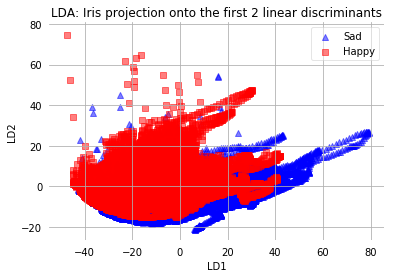

In [85]:
plot_step_lda(features_sparse_tsvd, y_train)

In [86]:
tsvd.components_.shape

(284, 577)

### Write CSV with reduced PCA features

In [87]:
import pandas
def getNewDF(X_data, y_labels, componentArray):
    loading_scores = pd.Series(componentArray[0])
    ## now sort the loading scores based on their magnitude
    sorted_loading_scores = loading_scores.abs().sort_values(ascending=False)
    top_feats = sorted_loading_scores[0:componentArray.shape[0]].index.values
    overrideHeaderFlag = False
    if writeTransformedDataFlag == True:
        if writeTransformedDataHeaderOverrideFlag == True:
            overrideHeaderFlag = True
    if overrideHeaderFlag == True:
        newHeadList = ["f" + str(i) for i in range(len(top_feats))]
    else:
        newHeadList = ["f" + str(i) for i in top_feats]
    print("newHeadList:", newHeadList)
    newDF = pandas.DataFrame(data=X_data, columns=newHeadList)
    newDF["label"] = y_labels
    return(newDF)

In [88]:
# Write Transformed data or Original Data
if writeTransformedDataFlag == True:
    newDF = getNewDF(features_sparse_tsvd, y_train, tsvd.components_)
else:
    newDF = getNewDF(X_train, y_train, tsvd.components_)

newHeadList: ['f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11', 'f12', 'f13', 'f14', 'f15', 'f16', 'f17', 'f18', 'f19', 'f20', 'f21', 'f22', 'f23', 'f24', 'f25', 'f26', 'f27', 'f28', 'f29', 'f30', 'f31', 'f32', 'f33', 'f34', 'f35', 'f36', 'f37', 'f38', 'f39', 'f40', 'f41', 'f42', 'f43', 'f44', 'f45', 'f46', 'f47', 'f48', 'f49', 'f50', 'f51', 'f52', 'f53', 'f54', 'f55', 'f56', 'f57', 'f58', 'f59', 'f60', 'f61', 'f62', 'f63', 'f64', 'f65', 'f66', 'f67', 'f68', 'f69', 'f70', 'f71', 'f72', 'f73', 'f74', 'f75', 'f76', 'f77', 'f78', 'f79', 'f80', 'f81', 'f82', 'f83', 'f84', 'f85', 'f86', 'f87', 'f88', 'f89', 'f90', 'f91', 'f92', 'f93', 'f94', 'f95', 'f96', 'f97', 'f98', 'f99', 'f100', 'f101', 'f102', 'f103', 'f104', 'f105', 'f106', 'f107', 'f108', 'f109', 'f110', 'f111', 'f112', 'f113', 'f114', 'f115', 'f116', 'f117', 'f118', 'f119', 'f120', 'f121', 'f122', 'f123', 'f124', 'f125', 'f126', 'f127', 'f128', 'f129', 'f130', 'f131', 'f132', 'f133', 'f134', 'f135', 'f136', 

In [89]:
newDF.to_csv(path_or_buf=(fileNameNoPrefix + "_ReducedTSVD" + str(n_feats) + ".gzip"), sep=",", index=False, 
             header=True, compression='gzip')

In [90]:
now = datetime.datetime.now()
print (now.strftime("%Y-%m-%d %H:%M:%S"))

2018-07-14 08:06:28
